### Improving Epidemiological Diseases Mitigation: A case study of Monkeypox using Agent-based Modelling and Machine Learning Approaches.

#### STAGE 3: Continous cleaning, replacing missing values, feature engineering,Encode categorical variables into numeric, dataset train,test splitting, Models implementation.

#### In addition for better model performance, I uses a Random Forest classifier to calculate feature importance and also, Heatmap with seaborn for feature relationship which real heal removing some redundant features.

#### At this stage I also set RANDOM_STATE seed to 42.

In [2]:
#!pip install xgboost


In [1]:
#Numerical manipulation libraries
import pandas as pd
import numpy as np

# Models implementation, model performance and Dataset test-train libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Visualization and plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sys

print(sys.version)

3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]


In [2]:
# imports the Python warnings module to provides a mechanism for handling warnings that occur during program execution.
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load data
df_mkp = pd.read_csv('Monkeypox.csv')
df_mkp.head(5)


ID     Status                             Location    City  Country  Age  \
0  1.0  confirmed  Guy's and St Thomas Hospital London  London  England  NaN   
1  2.0  confirmed  Guy's and St Thomas Hospital London  London  England  NaN   
2  3.0  confirmed                               London  London  England  NaN   
3  4.0  confirmed                               London  London  England  NaN   
4  5.0  confirmed                               London  London  England  NaN   

  Gender  Date_onset Date_confirmation        Symptoms  ...  \
0    NaN  29/04/2022        06/05/2022            rash  ...   
1    NaN  05/05/2022        12/05/2022            rash  ...   
2    NaN  30/04/2022        13/05/2022  vesicular rash  ...   
3   male         NaN        15/05/2022  vesicular rash  ...   
4   male         NaN        15/05/2022  vesicular rash  ...   

  Travel_history_location Travel_history_country   Genomics_Metadata  \
0  Lagos and Delta States                Nigeria  West African Clade   
1                     NaN                    NaN  West African Clade   
2                     NaN                    NaN  West African Clade   
3                     NaN                    NaN  West African Clade   
4                     NaN                    NaN  West African Clade   

  Confirmation_method                                             Source  \
0              RT-PCR  https://www.gov.uk/government/news/monkeypox-c...   
1              RT-PCR  https://www.gov.uk/government/news/monkeypox-c...   
2              RT-PCR  https://www.gov.uk/government/news/monkeypox-c...   
3                 NaN  https://www.gov.uk/government/news/monkeypox-c...   
4                 NaN  https://www.gov.uk/government/news/monkeypox-c...   

                                           Source_II  Date_entry  \
0  https://www.who.int/emergencies/disease-outbre...  18/05/2022   
1                                                NaN  18/05/2022   
2                                                NaN  18/05/2022   
3                                                NaN  18/05/2022   
4                                                NaN  18/05/2022   

  Date_last_modified Source_III Country_ISO3  
0         18/05/2022        NaN          GBR  
1         18/05/2022        NaN          GBR  
2         18/05/2022        NaN          GBR  
3         18/05/2022        NaN          GBR  
4         18/05/2022        NaN          GBR  

[5 rows x 31 columns]

In [4]:
# Check the shape of the dataset
df_mkp.shape

(1133, 31)

In [5]:
#check for missing value
df_mkp.isna().sum()

ID                            1
Status                        1
Location                    657
City                        762
Country                       1
Age                         965
Gender                      814
Date_onset                 1125
Date_confirmation           213
Symptoms                   1022
Hospitalised (Y/N/NA)      1001
Date_hospitalisation       1120
Isolated (Y/N/NA)           992
Date_isolation             1122
Outcome                    1132
Contact_comment            1097
Contact_ID                 1126
Contact_location           1129
Travel_history (Y/N/NA)    1004
Travel_history_entry       1121
Travel_history_start       1129
Travel_history_location    1106
Travel_history_country     1100
Genomics_Metadata          1110
Confirmation_method        1045
Source                        1
Source_II                   804
Date_entry                    2
Date_last_modified            2
Source_III                 1091
Country_ISO3                  0
dtype: i

## Data Preprocessing and Features Engineering

In [6]:
# Input missing values based on the nature of the column

# For categorical columns, you can use mode imputation
categorical_columns = df_mkp.select_dtypes(include=['object']).columns
for column in categorical_columns:
    df_mkp[column].fillna(df_mkp[column].mode()[0], inplace=True)

# Display the number of missing values after handling
print("\nMissing values after handling:")
print(df_mkp.isnull().sum())


Missing values after handling:
ID                            1
Status                        0
Location                      0
City                          0
Country                       0
Age                           0
Gender                        0
Date_onset                    0
Date_confirmation             0
Symptoms                      0
Hospitalised (Y/N/NA)         0
Date_hospitalisation          0
Isolated (Y/N/NA)             0
Date_isolation                0
Outcome                       0
Contact_comment               0
Contact_ID                 1126
Contact_location              0
Travel_history (Y/N/NA)       0
Travel_history_entry          0
Travel_history_start          0
Travel_history_location       0
Travel_history_country        0
Genomics_Metadata             0
Confirmation_method           0
Source                        0
Source_II                     0
Date_entry                    0
Date_last_modified            0
Source_III                    0
Country_

In [7]:
# Check the shape
df_mkp.shape

(1133, 31)

In [8]:
# List of unwanted features/columns to be removed
unwanted_features = ['ID', 'Contact_ID', 'Source_II', 'Date_last_modified', 'Source_III', 'Source', 'Country_ISO3', 'Confirmation_method']


# Drop unwanted features from the DataFrame
df_mkp.drop(unwanted_features, axis=1, inplace=True)

# Display the DataFrame after removing unwanted features
df_mkp.head()

Status                             Location    City  Country    Age  \
0  confirmed  Guy's and St Thomas Hospital London  London  England  20-64   
1  confirmed  Guy's and St Thomas Hospital London  London  England  20-64   
2  confirmed                               London  London  England  20-64   
3  confirmed                               London  London  England  20-64   
4  confirmed                               London  London  England  20-64   

  Gender  Date_onset Date_confirmation        Symptoms Hospitalised (Y/N/NA)  \
0   male  29/04/2022        06/05/2022            rash                     Y   
1   male  05/05/2022        12/05/2022            rash                     Y   
2   male  30/04/2022        13/05/2022  vesicular rash                     N   
3   male  29/04/2022        15/05/2022  vesicular rash                     Y   
4   male  29/04/2022        15/05/2022  vesicular rash                     Y   

   ...    Outcome                  Contact_comment Contact_location  \
0  ...  Recovered              Under investigation        Household   
1  ...  Recovered  Index Case of household cluster        Household   
2  ...  Recovered              Under investigation        Household   
3  ...  Recovered              Under investigation        Household   
4  ...  Recovered              Under investigation        Household   

  Travel_history (Y/N/NA) Travel_history_entry Travel_history_start  \
0                       Y           04/05/2022           late April   
1                       N           16/05/2022           late April   
2                       N           16/05/2022           late April   
3                       N           16/05/2022           late April   
4                       N           16/05/2022           late April   

  Travel_history_location Travel_history_country   Genomics_Metadata  \
0  Lagos and Delta States                Nigeria  West African Clade   
1                  Europe                  Spain  West African Clade   
2                  Europe                  Spain  West African Clade   
3                  Europe                  Spain  West African Clade   
4                  Europe                  Spain  West African Clade   

   Date_entry  
0  18/05/2022  
1  18/05/2022  
2  18/05/2022  
3  18/05/2022  
4  18/05/2022  

[5 rows x 23 columns]

In [9]:
# Remove any available Null value in the dataset
df_mkp.dropna(inplace=True)

In [15]:
# Specify the file path to save the CSV file
#file_path = 'Monkeypox_valuereplaced.csv'

# Save the cleaned DataFrame to a CSV file
#df_mkp.to_csv(file_path, index=False)

#print(f"Dataset has been saved to: {file_path}")

Dataset has been saved to: Monkeypox_valuereplaced.csv


In [10]:
## Cities in the Top Countries with the higher cases: Spain
df_mkp[df_mkp['Country'] == 'Spain'].groupby('City')['Status'].count()

City
03/06/2022         1
Almeria            3
Aragon             1
Barcelona          1
Cadiz              3
Costa del Sol      1
Fuerteventura      2
Gran Canaria      16
Madrid           275
Malaga            16
Seville            2
Tenerife           4
Valencia           2
Valladolid         1
Name: Status, dtype: int64

In [11]:
# Drop the rows where 'City' is '03/06/2022' as it's not relevant
df_mkp.drop(df_mkp[df_mkp['City'] == '03/06/2022'].index, inplace=True)

In [12]:
# Check to confirm removal of error data
df_mkp[df_mkp['Country'] == 'Spain'].groupby('City')['Status'].count()

City
Almeria            3
Aragon             1
Barcelona          1
Cadiz              3
Costa del Sol      1
Fuerteventura      2
Gran Canaria      16
Madrid           275
Malaga            16
Seville            2
Tenerife           4
Valencia           2
Valladolid         1
Name: Status, dtype: int64

In [13]:
# Check the shape
df_mkp.shape

(1132, 23)

In [14]:
# Encode categorical variables for better models implementation performance
categorical_features = df_mkp.select_dtypes(include=["object"]).columns.tolist()
for feature in categorical_features:
    le = LabelEncoder()
    df_mkp[feature] = le.fit_transform(df_mkp[feature])

In [15]:
df_mkp.head(10)

Status  Location  City  Country  Age  Gender  Date_onset  \
0       0        47    42       12    3       2           5   
1       0        47    42       12    3       2           0   
2       0        59    42       12    3       2           6   
3       0        59    42       12    3       2           5   
4       0        59    42       12    3       2           5   
5       0        59    42       12    3       2           5   
6       0        75    54       12    3       2           5   
7       0        55    39       36    2       2           5   
8       0        55    39       36    2       2           5   
9       0        55    39       36    2       2           5   

   Date_confirmation  Symptoms  Hospitalised (Y/N/NA)  ...  Outcome  \
0                  4        23                      1  ...        0   
1                  5        23                      1  ...        0   
2                  6        31                      0  ...        0   
3                  7        31                      1  ...        0   
4                  7        31                      1  ...        0   
5                  7        31                      0  ...        0   
6                  7        31                      1  ...        0   
7                  8        28                      0  ...        0   
8                  8        28                      0  ...        0   
9                  8        28                      0  ...        0   

   Contact_comment  Contact_location  Travel_history (Y/N/NA)  \
0               12                 0                        1   
1                8                 0                        0   
2               12                 0                        0   
3               12                 0                        0   
4               12                 0                        0   
5               12                 0                        0   
6               12                 0                        1   
7               12                 0                        0   
8               12                 0                        0   
9               12                 0                        0   

   Travel_history_entry  Travel_history_start  Travel_history_location  \
0                     0                     2                        6   
1                     3                     2                        5   
2                     3                     2                        5   
3                     3                     2                        5   
4                     3                     2                        5   
5                     3                     2                        5   
6                     3                     2                        8   
7                     3                     2                        5   
8                     3                     2                        5   
9                     3                     2                        5   

   Travel_history_country  Genomics_Metadata  Date_entry  
0                      10                  1           5  
1                      13                  1           5  
2                      13                  1           5  
3                      13                  1           5  
4                      13                  1           5  
5                      13                  1           5  
6                       5                  1           5  
7                      13                  1           5  
8                      13                  1           5  
9                      13                  1           5  

[10 rows x 23 columns]

In [16]:
# Check the shape
df_mkp.shape

(1132, 23)

In [85]:
# Specify the file path to save the CSV file
#file_path = 'Monkeypox_numericencode.csv'

# Save the cleaned DataFrame to a CSV file
#df_mkp.to_csv(file_path, index=False)

#print(f"Dataset has been saved to: {file_path}")

Dataset has been saved to: Monkeypox_numericencode.csv


In [17]:
# Display last 50 
df_mkp.tail(50)

Status  Location  City  Country  Age  Gender  Date_onset  \
1083       0       115    47        1    7       2           5   
1084       2        80    18        4    1       2           5   
1085       0       122    45       14    3       2           5   
1086       0       122    45       14    3       2           5   
1087       0       122    45       14    3       2           5   
1088       0       122    45       14    3       2           5   
1089       0       122    45       14    3       2           5   
1090       0       122    45       14    3       2           5   
1091       0       122    45       14    3       2           5   
1092       0       122    45       14    3       2           5   
1093       0       122    45       14    3       2           5   
1094       0       122    45       14    3       2           5   
1095       0       122    45       14    3       2           5   
1096       0       122    45       14    3       2           5   
1097       0       122    45       14    3       2           5   
1098       0        77    45       14    3       2           5   
1099       0        77    45       14    3       2           5   
1100       0         4    45       14    3       2           5   
1101       0         4    45       14    3       2           5   
1102       0        76    45       14    3       2           5   
1103       0        94    77       23    3       2           5   
1104       0        28    19       46    3       2           5   
1105       0        74    53       46    3       2           5   
1106       0        74    53       46    3       2           5   
1107       2        26    45        7    3       2           5   
1108       0        88    45        6    3       2           5   
1109       0        88    45        6    3       2           5   
1110       0        88    45        6    3       2           5   
1111       0        88    45        6    3       2           5   
1112       0        88    45        6    3       2           5   
1113       0        88    45        6    3       2           5   
1114       0        88    45        6    3       2           5   
1115       0        88    45        6    3       2           5   
1116       0        88    45        6    3       2           5   
1117       0        88    45        6    3       2           5   
1118       0        88    45        6    3       2           5   
1119       0        88    45        6    3       2           5   
1120       0        88    45        6    3       2           5   
1121       0        88    45        6    3       2           5   
1122       0        88    45        6    3       2           5   
1123       0        88    45        6    3       2           5   
1124       0        72    72        1    7       2           5   
1125       2        72    72        1    7       2           5   
1126       2        96    45       46    3       2           5   
1127       1        62    45       43    3       2           5   
1128       1        62    45       43    3       2           5   
1129       1        62    45       43    3       2           5   
1130       1        62    45       43    3       2           5   
1131       1        62    45       43    3       2           5   
1132       1        62    45       43    3       2           5   

      Date_confirmation  Symptoms  Hospitalised (Y/N/NA)  ...  Outcome  \
1083                  1        15                      0  ...        0   
1084                  1        17                      0  ...        0   
1085                  2        15                      0  ...        0   
1086                  2        15                      0  ...        0   
1087                  2        15                      0  ...        0   
1088                  2        15                      0  ...        0   
1089                  2        15                      0  ...        0   
1090                  2        15              

In [19]:
# Check the Status target variable class distribution, whether balanced or not
df_mkp['Status'].value_counts()

0    920
1    145
2     67
Name: Status, dtype: int64

### Narration: The above shows that the dataset is not balanced. 
### Therefore, the next steps will use SMOTE method to balance the dataset

In [19]:
#!pip install --upgrade scikit-learn
#!pip install imbalanced-learn
#!pip install scikit-learn==0.24.2
#!pip install imbalanced-learn==0.8.0

In [21]:
# Import required libraries
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [22]:
# Separate features and target variable
X = df_mkp.drop('Status', axis=1)
y = df_mkp['Status']

In [23]:
# Initialize SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(random_state=42)

In [24]:
# Apply SMOTE to balance the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

In [25]:
# Combine the resampled features and target variable into a new DataFrame
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Status')], axis=1)

In [27]:
# Check the distribution after balancing
print(df_resampled['Status'].value_counts())

0    920
1    920
2    920
Name: Status, dtype: int64


In [240]:
# Specify the file path to save the CSV file
#file_path = 'mk.csv'

# Save the cleaned DataFrame to a CSV file
#df_mkp.to_csv(file_path, index=False)

#print(f"Dataset has been saved to: {file_path}")

Dataset has been saved to: mk.csv


In [28]:
# Split data
# Separate features and target variable
X = df_mkp.drop('Status', axis=1)
y = df_mkp['Status']

#convert y back to Dataframe
y=y.to_frame()
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [29]:
y_train

Status
12         0
381        1
717        0
497        0
964        0
...      ...
121        0
1044       0
1096       0
860        0
1127       1

[905 rows x 1 columns]

In [30]:
# Check the shape of each splitted dataset if it's okay
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (905, 22)
X_test shape: (227, 22)
y_train shape: (905, 1)
y_test shape: (227, 1)


## This code uses a Random Forest classifier to calculate feature importance and then plots a bar chart to visualize the importance scores. 

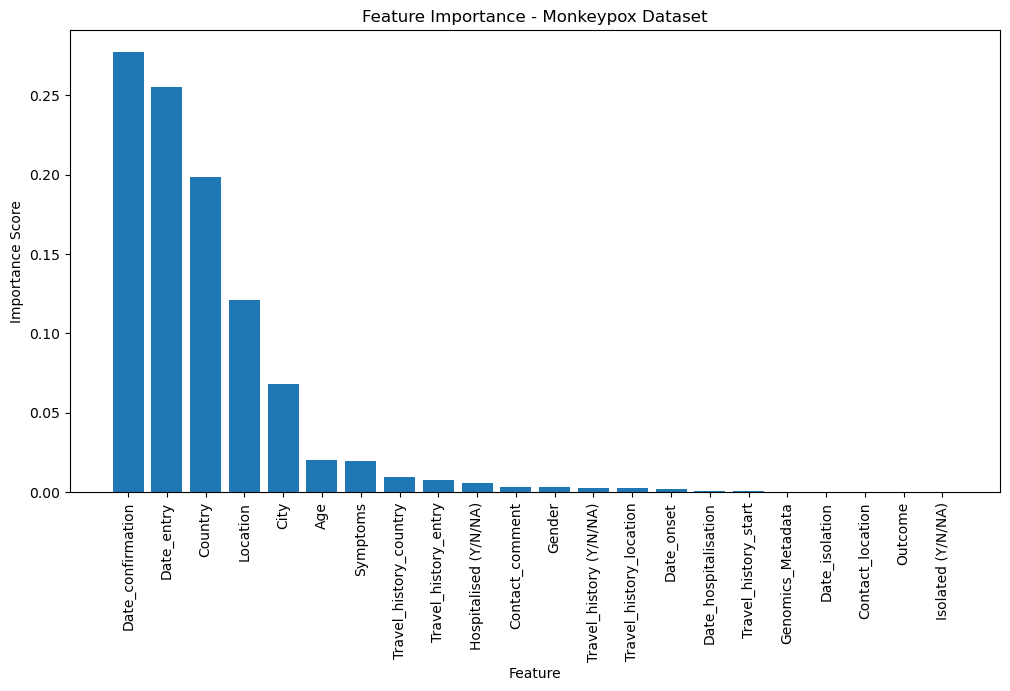

In [31]:
# Fit a Random Forest model for feature importance
rf = RandomForestClassifier(n_estimators=100)
#rf.fit(X_train, y_train.argmax(axis=1))

# Convert y_train to Numpy array
y_train_array = y_train.squeeze().values

# Fit the Random Forest model
rf.fit(X_train, y_train_array)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance - Monkeypox Dataset')
plt.xticks(rotation=90)
plt.show()

### This code generates a heatmap of the correlation matrix for the numeric features in the dataset in order to remove redundant features

In [32]:
# It was observed that some features in the X_train Dataframe contain constant values,
# some manipulation needs to be performed before the heatmap.

# Check for missing values
print(X_train.isnull().sum())

# Check the shape of your DataFrame
print(X_train.shape)

# Check for constant features
constant_features = X_train.columns[X_train.nunique() == 1]
print("Constant Features:", constant_features)

# Drop constant features
X_train = X_train.drop(columns=constant_features)

Location                   0
City                       0
Country                    0
Age                        0
Gender                     0
Date_onset                 0
Date_confirmation          0
Symptoms                   0
Hospitalised (Y/N/NA)      0
Date_hospitalisation       0
Isolated (Y/N/NA)          0
Date_isolation             0
Outcome                    0
Contact_comment            0
Contact_location           0
Travel_history (Y/N/NA)    0
Travel_history_entry       0
Travel_history_start       0
Travel_history_location    0
Travel_history_country     0
Genomics_Metadata          0
Date_entry                 0
dtype: int64
(905, 22)
Constant Features: Index(['Isolated (Y/N/NA)', 'Outcome'], dtype='object')


### Narration: 'Isolated (Y/N/NA)', 'Outcome' have been removed because they both contain constant values and not important.

In [33]:
# check the shape after removal
X_train.shape

(905, 20)

In [34]:
# Display First 10 rows
X_train.head(10)

Location  City  Country  Age  Gender  Date_onset  Date_confirmation  \
12         56    39       36    2       2           5                  9   
381        78    75        6    3       2           5                  1   
717        62    45       12    3       2           5                 20   
497        62     0       16    4       2           5                 20   
964        62    45       36    3       2           5                  1   
538        62    45       30    3       2           5                  1   
724        62     9       16    3       2           5                  2   
980        62    45       30    3       2           5                  1   
786        62    45       39    3       2           5                  1   
184       101    45       39    3       2           5                 12   

     Symptoms  Hospitalised (Y/N/NA)  Date_hospitalisation  Date_isolation  \
12         30                      0                     5               6   
381        15                      0                     5               6   
717        15                      0                     5               6   
497        15                      0                     5               6   
964        15                      0                     5               6   
538        15                      0                     5               6   
724        15                      1                     5               6   
980        15                      0                     5               6   
786        15                      0                     5               6   
184        15                      0                     5               6   

     Contact_comment  Contact_location  Travel_history (Y/N/NA)  \
12                12                 0                        0   
381               12                 0                        1   
717               12                 0                        1   
497               12                 0                        1   
964               12                 0                        1   
538               12                 0                        1   
724               12                 0                        1   
980               12                 0                        1   
786               12                 0                        1   
184               12                 0                        1   

     Travel_history_entry  Travel_history_start  Travel_history_location  \
12                      3                     2                        5   
381                     3                     2                        5   
717                     3                     2                        5   
497                     3                     2                        5   
964                     3                     2                        5   
538                     3                     2                        5   
724                     3                     2                        5   
980                     3                     2                        5   
786                     3                     2                        5   
184                     3                     2                        5   

     Travel_history_country  Genomics_Metadata  Date_entry  
12                       13                  1           5  
381                      13                  1          13  
717                      13                  1          18  
497                      11                  1          12  
964                      13                  1           1  
538                      13                  1          16  
724                      13                  1          18  
980                      13                  1           1  
786                      13                  1           0  
184                      13                  1           8

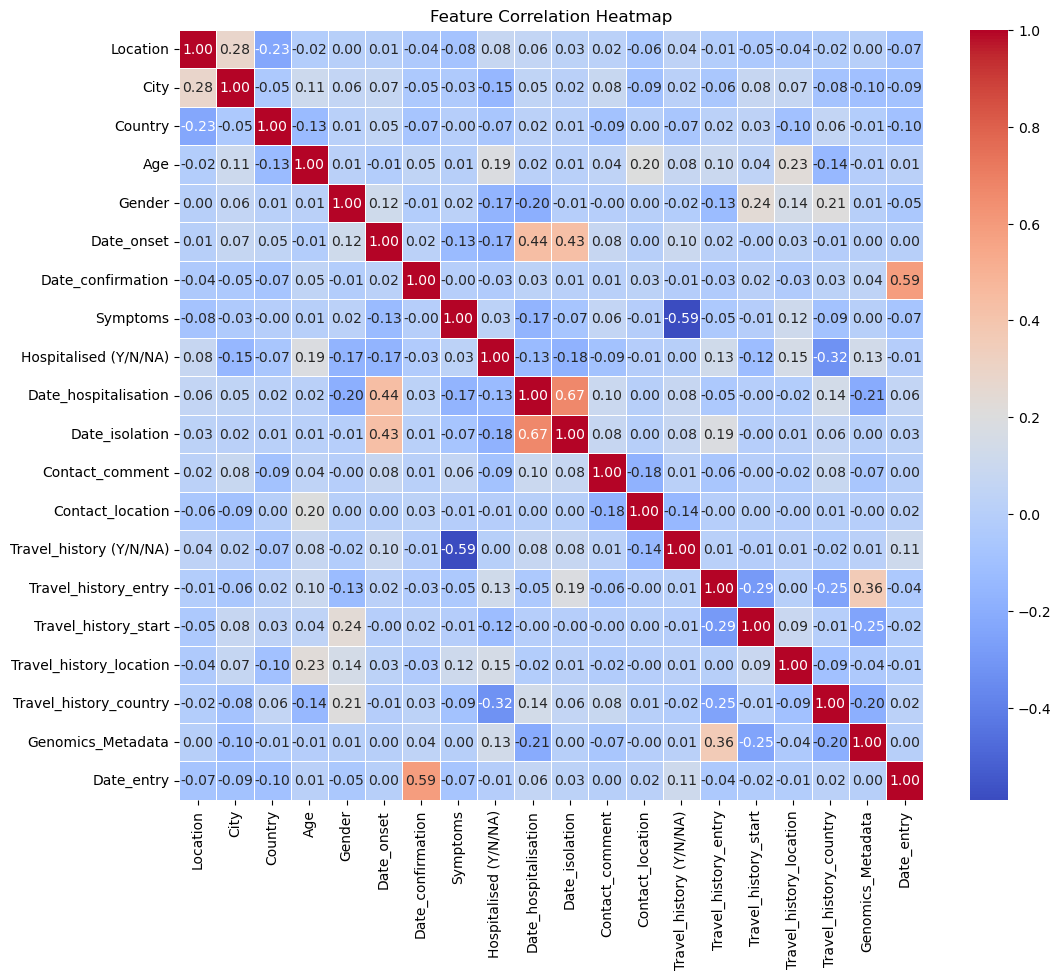

In [35]:
# Since X_train is our feature matrix and already converted to numeric
# We can calculate the correlation matrix to observe the features relationship
correlation_matrix = X_train.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

### Narration: Date_isolation, Date_entry, Location need to be removed

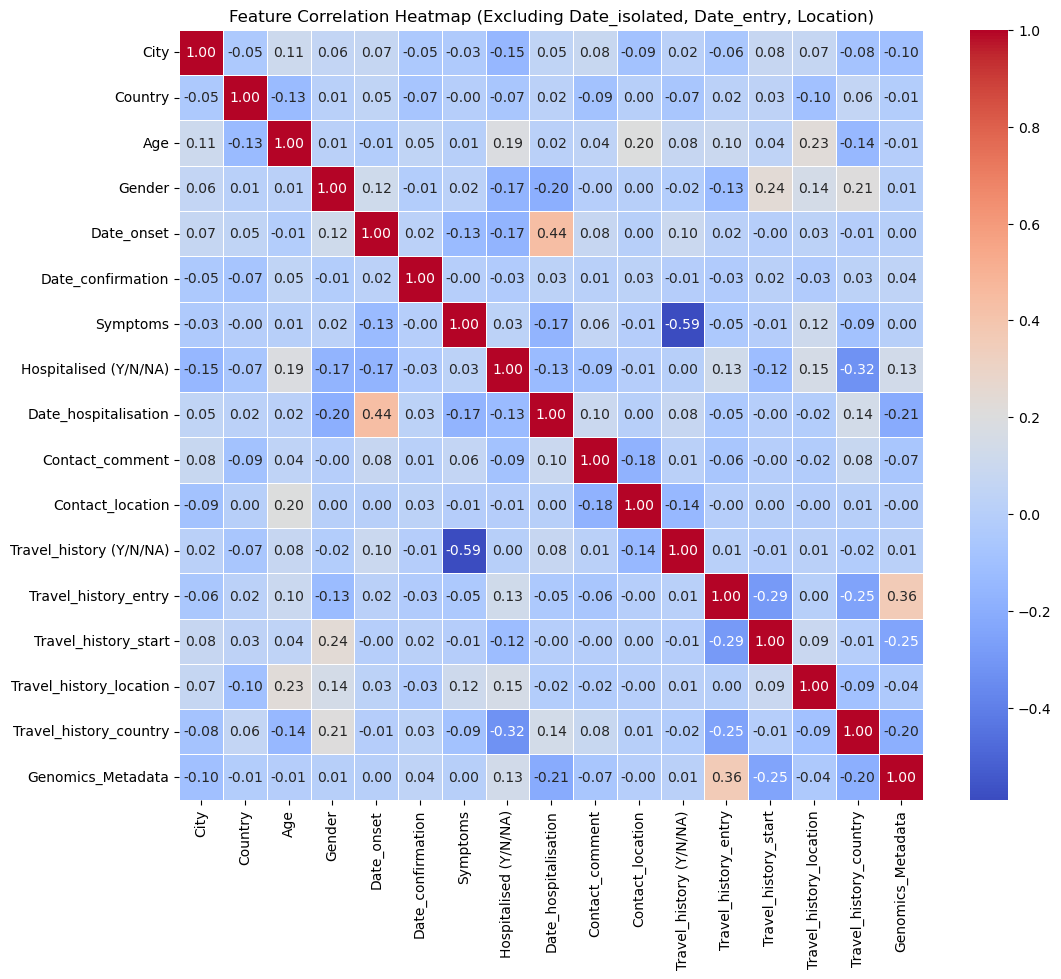

In [36]:
# Remove specific columns
columns_to_remove = ['Date_isolation', 'Date_entry', 'Location']
X_train_filtered = X_train.drop(columns=columns_to_remove)

# Calculate the correlation matrix
correlation_matrix = X_train_filtered.corr()

# Visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap (Excluding Date_isolated, Date_entry, Location)")
plt.show()

Observation and Recommendation: 
    Identifying the most influential aspects has been quite beneficial during our investigation.
    Using both the RandomForest classifier to assess feature relevance and a heatmap to assess feature 
    correlation has offered useful insights. The combination of these techniques made it easier to remove 
    five unnecessary and redundant features, resulting in a more optimised dataset.
    
Observation: Using a heatmap to analyse feature correlation improves performance and intelligence in feature recognition.
    This method has proven to be more effective at identifying redundant features than relying simply on the
    Random Forest classifier for feature importance calculation.

Recommendation: We advocate using heatmaps to analyse feature correlation in feature selection processes. 
    This dual methodology improves the precision of finding influential features, which contributes to 
    the overall effectiveness of the data analytics pipeline.







### Checking for outliers in the dataset X_train (Features) using boxplot

In [37]:
# Create an interactive boxplot for each feature in X_train
fig = px.box(X_train, points="all", title="Boxplot of Features (Check for Outliers)")
fig.update_layout(xaxis_title="Features", yaxis_title="Values", width=1000, height=600)
fig.show()

## Model Implementation and Evaluation

In [38]:
# Model Implementation and Evaluation
models = {}

In [39]:
# Implement SVC with kernel=linear on X_train and y_train
svm = SVC(kernel="linear", probability=True)  # Enable probability estimates
svm.fit(X_train, y_train)

# Ensure that X_test has the same columns as X_train
X_test = X_test[X_train.columns]

# Predictions
y_pred_svm = svm.predict(X_test)

# Flatten y_test if it's a DataFrame
y_test_flat = y_test.values.flatten()

# Use predict_proba for obtaining class probabilities
y_pred_svm_probs = svm.predict_proba(X_test)

# Now calculate metrics
svm_metrics = {
    "Accuracy": accuracy_score(y_test_flat, y_pred_svm),
    "Precision": precision_score(y_test_flat, y_pred_svm, average='weighted'),
    "Recall": recall_score(y_test_flat, y_pred_svm, average='weighted'),
    "F1-score": f1_score(y_test_flat, y_pred_svm, average='weighted'),
    "AUC-ROC": roc_auc_score(y_test_flat, y_pred_svm_probs, multi_class='ovr'),
}

print(svm_metrics)

{'Accuracy': 0.8193832599118943, 'Precision': 0.8012606998316679, 'Recall': 0.8193832599118943, 'F1-score': 0.7902084563331668, 'AUC-ROC': 0.8923540740913666}


In [40]:
# Print actual and predicted values for SVM
print("Actual vs Predicted values for SVM:")
comparison_df_svm = pd.DataFrame({
    "Actual": y_test_flat,
    "Predicted": y_pred_svm
})
#print(comparison_df_svm)
comparison_df_svm.head(50)

Actual vs Predicted values for SVM:


Actual  Predicted
0        1          0
1        0          0
2        0          0
3        0          0
4        0          0
5        0          0
6        0          0
7        0          0
8        0          0
9        1          0
10       0          0
11       0          0
12       2          2
13       0          2
14       0          0
15       0          0
16       0          0
17       0          0
18       0          0
19       0          0
20       0          0
21       1          0
22       0          0
23       0          0
24       0          0
25       0          0
26       0          0
27       1          0
28       0          0
29       0          0
30       0          0
31       0          0
32       2          0
33       0          0
34       1          0
35       0          0
36       0          0
37       0          0
38       0          0
39       2          2
40       0          0
41       0          0
42       0          0
43       0          0
44       0          0
45       0          0
46       0          0
47       0          2
48       1          0
49       0          0

In [41]:

# Random Forest (RF)
# Define a random state to maintain same result at every run
RANDOM_STATE = 42

# Random Forest (RF)
rf = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Store metrics directly
models["RF"] = {
    "metrics": {
        "Accuracy": accuracy_score(y_test, y_pred_rf),
        "Precision": precision_score(y_test, y_pred_rf, average='weighted'),
        "Recall": recall_score(y_test, y_pred_rf, average='weighted'),
        "F1-score": f1_score(y_test, y_pred_rf, average='weighted'),
        "AUC-ROC": roc_auc_score(y_test, rf.predict_proba(X_test), multi_class='ovr'),
    },
    "model": rf  # Optionally store the model itself 
}

# Output the stored metrics
print(models["RF"])

{'metrics': {'Accuracy': 0.960352422907489, 'Precision': 0.9647969322964093, 'Recall': 0.960352422907489, 'F1-score': 0.9619762217353703, 'AUC-ROC': 0.9907117586837205}, 'model': RandomForestClassifier(random_state=42)}


In [42]:
# Compare actual and predicted values for Random Forest
y_test_flat = y_test.values.ravel()
comparison_df_rf = pd.DataFrame({
    "Actual": y_test_flat,
    "Predicted": y_pred_rf
})

# Print actual vs predicted values for Random Forest
print("\nRandom Forest (RF) - Actual vs Predicted values:")
#print(comparison_df_rf)
comparison_df_rf.head(50)


Random Forest (RF) - Actual vs Predicted values:


Actual  Predicted
0        1          1
1        0          0
2        0          0
3        0          0
4        0          0
5        0          0
6        0          0
7        0          0
8        0          0
9        1          1
10       0          0
11       0          0
12       2          2
13       0          2
14       0          0
15       0          0
16       0          0
17       0          0
18       0          0
19       0          0
20       0          0
21       1          1
22       0          0
23       0          0
24       0          0
25       0          0
26       0          0
27       1          1
28       0          0
29       0          0
30       0          0
31       0          0
32       2          2
33       0          0
34       1          1
35       0          0
36       0          0
37       0          0
38       0          0
39       2          2
40       0          0
41       0          0
42       0          1
43       0          0
44       0          0
45       0          0
46       0          0
47       0          0
48       1          1
49       0          0

In [43]:
# Decision Tree (DT)
# Add a random state for reproducibility
RANDOM_STATE = 42

# Decision Tree (DT)
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

models["DecisionTree"] = {
    "metrics": {
        "Accuracy": accuracy_score(y_test, y_pred_dt),
        "Precision": precision_score(y_test, y_pred_dt, average='weighted'),
        "Recall": recall_score(y_test, y_pred_dt, average='weighted'),
        "F1-score": f1_score(y_test, y_pred_dt, average='weighted'),
        "AUC-ROC": roc_auc_score(y_test, dt.predict_proba(X_test), multi_class='ovr'),
    },
    "model": dt  # Optionally store the model itself 
}

# Print the metrics
print(models["DecisionTree"])

{'metrics': {'Accuracy': 0.9427312775330396, 'Precision': 0.9529221317935572, 'Recall': 0.9427312775330396, 'F1-score': 0.9465902452118168, 'AUC-ROC': 0.9480023677557637}, 'model': DecisionTreeClassifier(random_state=42)}


In [44]:
# Print actual and predicted values
print("Actual vs Predicted values for Decision Tree:")
comparison_df_dt = pd.DataFrame({
    "Actual": y_test_flat,
    "Predicted": y_pred_dt
})
#print(comparison_df_dt)
comparison_df_dt.head(50)

Actual vs Predicted values for Decision Tree:


Actual  Predicted
0        1          1
1        0          0
2        0          0
3        0          0
4        0          0
5        0          0
6        0          0
7        0          0
8        0          0
9        1          1
10       0          0
11       0          0
12       2          2
13       0          2
14       0          0
15       0          0
16       0          0
17       0          0
18       0          0
19       0          0
20       0          0
21       1          1
22       0          0
23       0          0
24       0          0
25       0          0
26       0          0
27       1          2
28       0          0
29       0          0
30       0          0
31       0          0
32       2          2
33       0          0
34       1          1
35       0          0
36       0          0
37       0          0
38       0          0
39       2          2
40       0          0
41       0          0
42       0          1
43       0          0
44       0          0
45       0          0
46       0          0
47       0          0
48       1          1
49       0          0

In [45]:
# XGBoost
xgb_model = xgb.XGBClassifier()
models["XGBoost"] = xgb_model
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
models["XGBoost"] = {
    "Accuracy": accuracy_score(y_test, y_pred_xgb),
    "Precision": precision_score(y_test, y_pred_xgb, average='weighted'),
    "Recall": recall_score(y_test, y_pred_xgb, average='weighted'),
    "F1-score": f1_score(y_test, y_pred_xgb, average='weighted'),
    "AUC-ROC": roc_auc_score(y_test, xgb_model.predict_proba(X_test), multi_class='ovr'),
}
print(models["XGBoost"])

{'Accuracy': 0.9427312775330396, 'Precision': 0.9538742251673064, 'Recall': 0.9427312775330396, 'F1-score': 0.9466552843436243, 'AUC-ROC': 0.990064870726659}


In [46]:
# Print actual and predicted values for XGBoost
print("Actual vs Predicted values for XGBoost:")
comparison_df_xgb = pd.DataFrame({
    "Actual": y_test_flat,
    "Predicted": y_pred_xgb
})
#print(comparison_df_xgb)
comparison_df_xgb.head(50)

Actual vs Predicted values for XGBoost:


Actual  Predicted
0        1          1
1        0          0
2        0          0
3        0          0
4        0          0
5        0          0
6        0          0
7        0          0
8        0          0
9        1          1
10       0          0
11       0          0
12       2          2
13       0          2
14       0          0
15       0          0
16       0          0
17       0          0
18       0          0
19       0          0
20       0          0
21       1          1
22       0          0
23       0          0
24       0          0
25       0          0
26       0          0
27       1          1
28       0          0
29       0          0
30       0          0
31       0          0
32       2          2
33       0          0
34       1          1
35       0          0
36       0          0
37       0          0
38       0          0
39       2          2
40       0          0
41       0          0
42       0          1
43       0          0
44       0          0
45       0          0
46       0          0
47       0          2
48       1          1
49       0          0

In [47]:
# import require library
import tensorflow as tf
import random
import os

# Set the random seeds
RANDOM_STATE = 42
os.environ['PYTHONHASHSEED']=str(RANDOM_STATE)
random.seed(RANDOM_STATE)
np.random.seed(RANDOM_STATE)
tf.random.set_seed(RANDOM_STATE)

# Neural Network (Multiclass)
model_nn = Sequential()
model_nn.add(Dense(128, activation="relu", input_shape=(X_train.shape[1],)))
model_nn.add(Dense(64, activation="relu"))
model_nn.add(Dense(len(df_mkp['Status'].unique()), activation="softmax"))  # Adjust the number of classes
model_nn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# One-hot encode the target variable
y_train_one_hot = to_categorical(y_train)

# Train the model
model_nn.fit(X_train, y_train_one_hot, epochs=10, batch_size=32)

# Predictions
y_pred_nn = model_nn.predict(X_test)

# Metrics
metrics_nn = {
    "Accuracy": accuracy_score(y_test, np.argmax(y_pred_nn, axis=1)),
    "Precision": precision_score(y_test, np.argmax(y_pred_nn, axis=1), average='weighted'),
    "Recall": recall_score(y_test, np.argmax(y_pred_nn, axis=1), average='weighted'),
    "F1-score": f1_score(y_test, np.argmax(y_pred_nn, axis=1), average='weighted'),
    "AUC-ROC": roc_auc_score(y_test, y_pred_nn, multi_class='ovr'),
}

print("Neural Network Metrics:", metrics_nn)

Epoch 1/10
29/29 [==============================] - 1s 2ms/step - loss: 0.7342 - accuracy: 0.7845
Epoch 2/10
29/29 [==============================] - 0s 2ms/step - loss: 0.4028 - accuracy: 0.8398
Epoch 3/10
29/29 [==============================] - 0s 2ms/step - loss: 0.3401 - accuracy: 0.8552
Epoch 4/10
29/29 [==============================] - 0s 2ms/step - loss: 0.3465 - accuracy: 0.8486
Epoch 5/10
29/29 [==============================] - 0s 2ms/step - loss: 0.3465 - accuracy: 0.8508
Epoch 6/10
29/29 [==============================] - 0s 3ms/step - loss: 0.3320 - accuracy: 0.8608
Epoch 7/10
29/29 [==============================] - 0s 3ms/step - loss: 0.3154 - accuracy: 0.8575
Epoch 8/10
29/29 [==============================] - 0s 3ms/step - loss: 0.3004 - accuracy: 0.8552
Epoch 9/10
29/29 [==============================] - 0s 3ms/step - loss: 0.3022 - accuracy: 0.8486
Epoch 10/10
8/8 [==============================] - 0s 2ms/step
Neural Network Metrics: {'Accuracy': 0.8281938325991189

In [48]:
# Flatten y_test into a 1D array
y_test_labels = y_test.values.ravel()

# Flatten y_pred_nn into a 1D array
y_pred_nn_flat = np.argmax(y_pred_nn, axis=1)

# Create a DataFrame for actual vs predicted values
comparison_df_nn = pd.DataFrame({
    "Actual": y_test_labels,
    "Predicted": y_pred_nn_flat
})

# Print actual and predicted values for Neural Network
print("Actual vs Predicted values for Neural Network:")
#print(comparison_df_nn)
comparison_df_nn.head(50)

Actual vs Predicted values for Neural Network:


Actual  Predicted
0        1          0
1        0          0
2        0          0
3        0          0
4        0          0
5        0          0
6        0          0
7        0          0
8        0          0
9        1          0
10       0          0
11       0          0
12       2          2
13       0          2
14       0          0
15       0          0
16       0          0
17       0          0
18       0          0
19       0          0
20       0          0
21       1          2
22       0          0
23       0          0
24       0          0
25       0          0
26       0          0
27       1          0
28       0          0
29       0          0
30       0          0
31       0          0
32       2          0
33       0          0
34       1          0
35       0          0
36       0          0
37       0          0
38       0          0
39       2          2
40       0          0
41       0          0
42       0          0
43       0          0
44       0          0
45       0          0
46       0          0
47       0          2
48       1          0
49       0          0

SVM Model


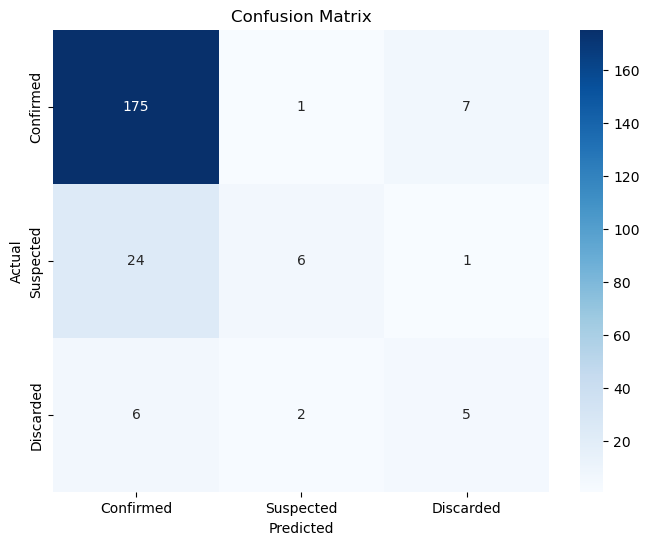

RF Model


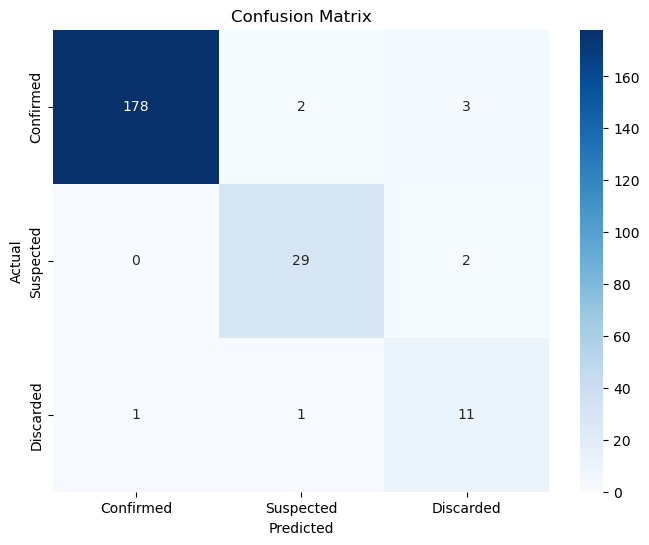

XGBoost Model


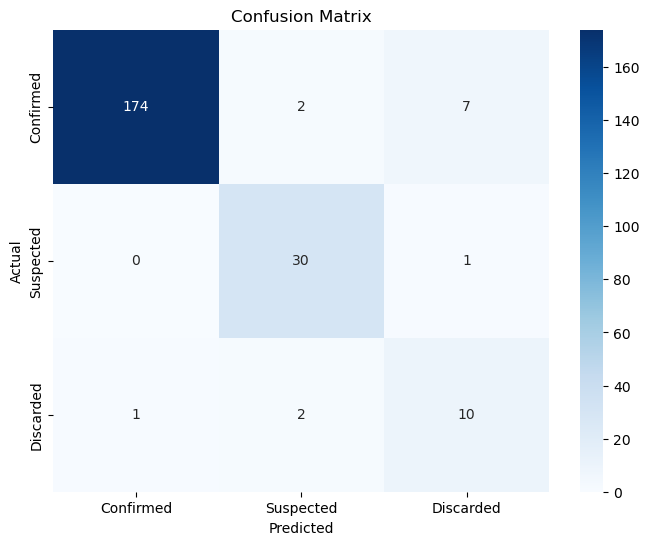

DT Model


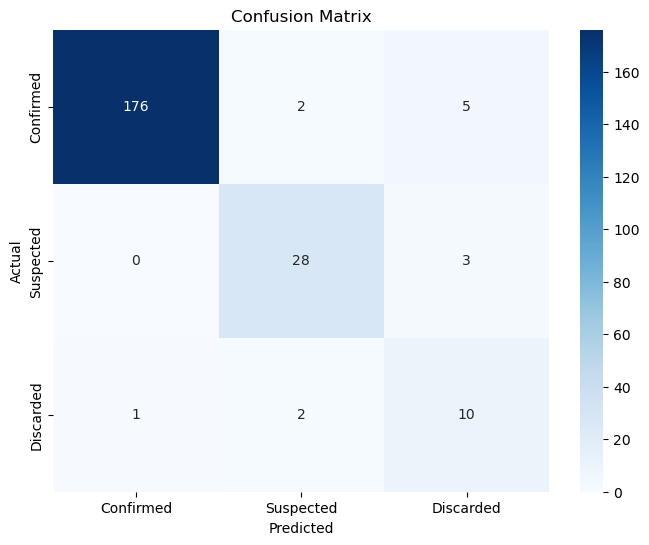

Neurat Network Model


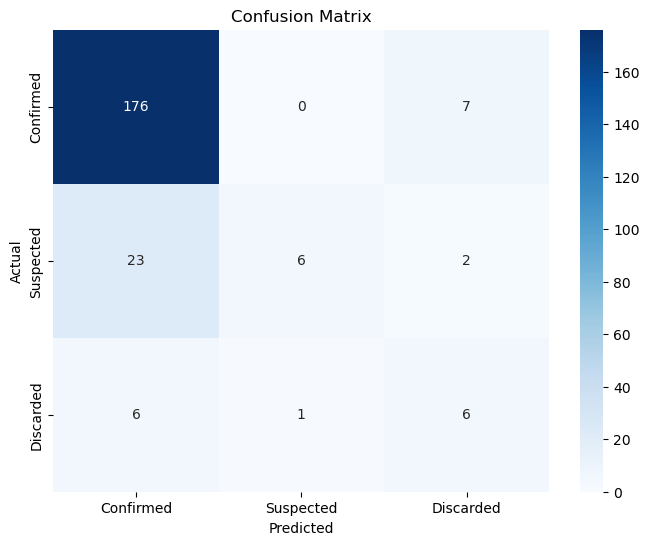

In [49]:
from sklearn.metrics import confusion_matrix

#  try converting y_pred_nn to categorical labels using np.argmax before calculating the confusion matrix
y_pred_nn_labels = np.argmax(y_pred_nn, axis=1)
cm = confusion_matrix(y_test, y_pred_nn_labels)

# Function to plot confusion matrix for all models
def plot_conf_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

# Based on predictions for each model: y_pred_svm, y_pred_rf, y_pred_xgb, y_pred_dt, y_pred_nn_labels

# List of class labels
class_labels = ["Confirmed", "Suspected", "Discarded"]

# Plot confusion matrices for each model
print('SVM Model')
plot_conf_matrix(y_test, y_pred_svm, labels=class_labels)

print('RF Model')
plot_conf_matrix(y_test, y_pred_rf, labels=class_labels)

print('XGBoost Model')
plot_conf_matrix(y_test, y_pred_xgb, labels=class_labels)

print('DT Model')
plot_conf_matrix(y_test, y_pred_dt, labels=class_labels)

print('Neurat Network Model')
plot_conf_matrix(y_test, y_pred_nn_labels, labels=class_labels)  

Here, let's interpret the matrix based on the Monkeypox prediction:

Confirmed (Positive) Cases:

True Positives (TP): Instances correctly predicted as confirmed cases.
False Negatives (FN): Instances where confirmed cases were incorrectly predicted as suspected or discarded.
Suspected (Positive) Cases:

False Positives (FP): Instances where suspected cases were incorrectly predicted as confirmed or discarded.
True Positives (TP): Instances correctly predicted as suspected cases.
Discarded (Negative) Cases:

False Negatives (FN): Instances where discarded cases were incorrectly predicted as confirmed or suspected.
True Positives (TP): Instances correctly predicted as discarded cases.
Now, let's relate these to key metrics:

Accuracy: Overall correctness of the model in predicting all classes.
Precision: For each class (Confirmed, Suspected, Discarded), how many of the predicted cases are actually of that class.
Recall (Sensitivity): For each class, how many of the actual cases were correctly predicted by the model.
Specificity: For each class other than the one considered, how many of the actual cases were correctly predicted as not being in that class.
F1 Score: A balance between precision and recall for each class.
For stakeholders, you might say:

Accuracy: The model is correct in predicting Monkeypox cases overall.
Precision (Confirmed): When it predicts a confirmed case, it's usually correct.
Recall (Suspected): It captures most of the suspected cases when they occur.
Specificity (Discarded): It correctly identifies cases as discarded when they are not confirmed or suspected.

In [50]:
import plotly.graph_objects as go
from sklearn.metrics import classification_report

# Assuming you have a list of model names and their corresponding predictions
model_names = ["SVM", "Random Forest", "XGBoost", "Decision Tree", "Neural Network"]
y_preds = [y_pred_svm, y_pred_rf, y_pred_xgb, y_pred_dt, y_pred_nn_labels]
class_labels = ["Confirmed", "Suspected", "Discarded"]

# Create a DataFrame to store precision for each model and class
precision_df = pd.DataFrame(index=model_names, columns=class_labels)

# Populate precision_df with precision values for each model and class
for model_name, y_pred in zip(model_names, y_preds):
    classification_rep = classification_report(y_test, y_pred, target_names=class_labels, output_dict=True)
    precision_df.loc[model_name] = [classification_rep[label]["precision"] for label in class_labels]

# Round the precision values to 3 decimal places and convert to string
precision_df = precision_df.round(3).astype(str)

# Create an interactive bar chart for precision with text annotations
fig = go.Figure()

for label in class_labels:
    fig.add_trace(go.Bar(
        x=model_names,
        y=precision_df[label].values.astype(float),  # Convert back to float for plotting
        text=precision_df[label],
        textposition='auto',
        name=label
    ))

fig.update_layout(
    barmode='group',
    xaxis_title='Model',
    yaxis_title='Precision',
    title="Model Precision Comparison",
    showlegend=True
)

fig.show()

In [51]:
import plotly.graph_objects as go
import pandas as pd
from sklearn.metrics import classification_report

# list of model names and their corresponding predictions
model_names = ["SVM", "Random Forest", "XGBoost", "Decision Tree", "Neural Network"]
y_preds = [y_pred_svm, y_pred_rf, y_pred_xgb, y_pred_dt, y_pred_nn_labels]
class_labels = ["Confirmed", "Suspected", "Discarded"]

# Create a DataFrame to store accuracy for each model and class
accuracy_df = pd.DataFrame(index=model_names, columns=class_labels)

# Populate accuracy_df with accuracy values for each model and class
for model_name, y_pred in zip(model_names, y_preds):
    classification_rep = classification_report(y_test, y_pred, target_names=class_labels, output_dict=True)
    accuracy_df.loc[model_name] = [classification_rep[label]["precision"] for label in class_labels]

# Round the accuracy values to 3 decimal places and convert to string
accuracy_df = accuracy_df.round(3).astype(str)

# Create an interactive bar chart for accuracy with text annotations
fig = go.Figure()

for label in class_labels:
    fig.add_trace(go.Bar(
        x=model_names,
        y=accuracy_df[label].values.astype(float),  # Convert back to float for plotting
        text=accuracy_df[label],
        textposition='auto',
        name=label
    ))

fig.update_layout(
    barmode='group',
    xaxis_title='Model',
    yaxis_title='Accuracy',
    title="Model Accuracy Comparison",
    showlegend=True
)

fig.show()

In [52]:
import plotly.graph_objects as go
from sklearn.metrics import classification_report

# Assuming you have a list of model names and their corresponding predictions
model_names = ["SVM", "Random Forest", "XGBoost", "Decision Tree", "Neural Network"]
y_preds = [y_pred_svm, y_pred_rf, y_pred_xgb, y_pred_dt, y_pred_nn_labels]
class_labels = ["Confirmed", "Suspected", "Discarded"]

# Create a DataFrame to store recall and F1 score for each model and class
recall_df = pd.DataFrame(index=model_names, columns=class_labels)
f1_score_df = pd.DataFrame(index=model_names, columns=class_labels)

# Populate recall_df and f1_score_df with values for each model and class
for model_name, y_pred in zip(model_names, y_preds):
    classification_rep = classification_report(y_test, y_pred, target_names=class_labels, output_dict=True)
    recall_df.loc[model_name] = [classification_rep[label]["recall"] for label in class_labels]
    f1_score_df.loc[model_name] = [classification_rep[label]["f1-score"] for label in class_labels]

# Round the values to 3 decimal places and convert to string
recall_df = recall_df.round(3).astype(str)
f1_score_df = f1_score_df.round(3).astype(str)

# Create an interactive bar chart for Recall with text annotations
fig_recall = go.Figure()

for label in class_labels:
    fig_recall.add_trace(go.Bar(
        x=model_names,
        y=recall_df[label].values.astype(float),  # Convert back to float for plotting
        text=recall_df[label],
        textposition='auto',
        name=label
    ))

fig_recall.update_layout(
    barmode='group',
    xaxis_title='Model',
    yaxis_title='Recall',
    title="Model Recall Comparison",
    showlegend=True
)

# Create an interactive bar chart for F1 Score with text annotations
fig_f1_score = go.Figure()

for label in class_labels:
    fig_f1_score.add_trace(go.Bar(
        x=model_names,
        y=f1_score_df[label].values.astype(float),  # Convert back to float for plotting
        text=f1_score_df[label],
        textposition='auto',
        name=label
    ))

fig_f1_score.update_layout(
    barmode='group',
    xaxis_title='Model',
    yaxis_title='F1 Score',
    title="Model F1 Score Comparison",
    showlegend=True
)

fig_recall.show()
fig_f1_score.show()

### Hyperparameters with GridSearchCV for improving best three performed models

In [53]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

# Using suitable parameters to search for each model

# Random Forest first stage
'''rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}'''

# Random Forest second stage
rf_params = {
    'n_estimators': [100, 200],  # A higher number of trees can average out predictions, similar to adding more features in L2 regularization.
    'max_depth': [10, 15],  # Limiting the depth of trees can prevent overfitting, similar to the effect of L1 regularization by making the model simpler.
    'min_samples_split': [2, 5],  # Increasing this number makes the tree more conservative.
    'min_samples_leaf': [1, 2, 4],  # Increasing the minimum number of samples required at a leaf node can smooth the model, similar to increasing regularization.
    # Considering adding a parameter that controls the features' selection rate, akin to feature regularization:
    'max_features': ['sqrt', 'log2'],  # Limiting the number of features considered for splits can introduce regularization effects by reducing the model's complexity.
}

rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring=make_scorer(accuracy_score))
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

# XGBoost# first parameters adjustment
#xgb_params = {
#    'learning_rate': [0.01, 0.1, 0.2],
#    'max_depth': [3, 5, 7],
 #   'n_estimators': [50, 100, 200],
 #   'subsample': [0.8, 1.0],
 #   'colsample_bytree': [0.8, 1.0]
#}


'''xgb_params = {
    'learning_rate': [0.05, 0.1, 0.15],  # Smaller values make the model more robust by controlling the weight of new trees added to the model.
    'max_depth': [4, 6, 8],  # Adjusting depth to control complexity of the model, deeper trees can model more complex patterns but risk overfitting.
    'n_estimators': [100, 300, 500],  # Increasing the number of trees may improve model performance until a certain point.
    'subsample': [0.7, 0.9, 1.0],  # Subsampling the data helps with preventing overfitting by making the algorithm more conservative.
    'colsample_bytree': [0.7, 0.9, 1.0],  # Controls the fraction of features used per tree, helping in preventing overfitting and adding randomness.
    'min_child_weight': [1, 3, 5],  # Minimum sum of instance weight needed in a child. If a leaf node has a sum of weights lower than min_child_weight, the tree splitting process will stop.
    'gamma': [0, 0.1, 0.2],  # Minimum loss reduction required to make a further partition on a leaf node of the tree, helps in pruning and dealing with overfitting.
    'reg_alpha': [0, 0.1, 0.5],  # L1 regularization term on weights. Can be used in case of high dimensionality to make the algorithm run faster and avoid overfitting.
    'reg_lambda': [1, 0.5, 0.1]  # L2 regularization term on weights, encourages smoother weights and thus more regularized model.
}'''

# XGBoost Second parameters adjustment
xgb_params = {
    'learning_rate': [0.05, 0.1],  # Simplified range
    'max_depth': [4, 6],  # Simplified range
    'n_estimators': [100, 200],  # Limited options
    'subsample': [0.8, 1.0],  # Essential parameter, kept simple
    'colsample_bytree': [0.8, 1.0],  # Essential parameter, kept simple
    'reg_alpha': [0.0, 0.1],  # Adding L1 regularization with a minimal range
    'reg_lambda': [1.0, 1.5],  # Adding L2 regularization with a minimal range to test slight variations
}

xgb = XGBClassifier(random_state=42)
xgb_grid = GridSearchCV(xgb, xgb_params, cv=5, scoring=make_scorer(accuracy_score))
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_

# Decision Tree first stage
'''dt_params = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}'''

# Decision Tree second stage
dt_params = {
    'max_depth': [None, 10, 15],  # Adding an intermediate depth option
    'min_samples_split': [2, 10],  # Simplify the range, focusing on potentially more significant splits
    'min_samples_leaf': [1, 4]  # Limit to two options for simplicity and potential regularization effect
}

dt = DecisionTreeClassifier(random_state=42)
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring=make_scorer(accuracy_score))
dt_grid.fit(X_train, y_train)
best_dt = dt_grid.best_estimator_

# Final models for prediction
y_pred_rf = best_rf.predict(X_test)
y_pred_xgb = best_xgb.predict(X_test)
y_pred_dt = best_dt.predict(X_test)

### This code calculates and displays a table of accuracy, precision, recall, F1-score, and AUC-ROC for the Random Forest, XGBoost, and Decision.

##### Three models after hyperparameter tuning. The average='weighted' argument in precision, recall, and F1-score functions accounts for label imbalance by computing the metrics for each label and finding their average weighted by the number of true instances for each label. The roc_auc_score with multi_class='ovr' (one-vs-rest) computes the AUC-ROC score for multi-class classification by considering each class against all others, which is suitable for multi-class datasets.

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Compute the performance metrics for each model
metrics = {
    'Random Forest': {
        'Accuracy': accuracy_score(y_test, y_pred_rf),
        'Precision': precision_score(y_test, y_pred_rf, average='weighted'),
        'Recall': recall_score(y_test, y_pred_rf, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred_rf, average='weighted'),
        'AUC-ROC': roc_auc_score(y_test, best_rf.predict_proba(X_test), multi_class='ovr', average='weighted')
    },
    'XGBoost': {
        'Accuracy': accuracy_score(y_test, y_pred_xgb),
        'Precision': precision_score(y_test, y_pred_xgb, average='weighted'),
        'Recall': recall_score(y_test, y_pred_xgb, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred_xgb, average='weighted'),
        'AUC-ROC': roc_auc_score(y_test, best_xgb.predict_proba(X_test), multi_class='ovr', average='weighted')
    },
    'Decision Tree': {
        'Accuracy': accuracy_score(y_test, y_pred_dt),
        'Precision': precision_score(y_test, y_pred_dt, average='weighted'),
        'Recall': recall_score(y_test, y_pred_dt, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred_dt, average='weighted'),
        'AUC-ROC': roc_auc_score(y_test, best_dt.predict_proba(X_test), multi_class='ovr', average='weighted')
    }
}

# Displaying the metrics in a tabular form
import pandas as pd

results_df = pd.DataFrame(metrics).transpose()
print(results_df)

               Accuracy  Precision    Recall  F1-Score   AUC-ROC
Random Forest  0.960352   0.963067  0.960352  0.961286  0.992636
XGBoost        0.929515   0.936284  0.929515  0.932078  0.985342
Decision Tree  0.942731   0.952922  0.942731  0.946590  0.976302


In [55]:

#print('Actual_Value',y_test_flat)

#print('y_pred_rf',y_pred_rf)
#print('y_pred_xgb',y_pred_xgb)
#print('y_pred_dt',y_pred_dt) 

# Since we have y_test_flat, y_pred_rf, y_pred_xgb, y_pred_dt as your predictions
data = {
    'Actual_Value': y_test_flat,
    'Random_Forest_Predicted': y_pred_rf,
    'XGBoost_Predicted': y_pred_xgb,
    'Decision_Tree_Predicted': y_pred_dt
}

# Create a DataFrame
result_df = pd.DataFrame(data)

# Display the DataFrame
styled_df = result_df.style.set_properties(**{'text-align': 'center'})
styled_df.set_table_styles([dict(selector='th', props=[('text-align', 'center')])])

# Use display function to render in Jupyter Notebook
display(styled_df)

In [56]:
import plotly.graph_objects as go
import pandas as pd
from sklearn.metrics import classification_report

# list of model names and their corresponding tuned models
tuned_models = {
    "RF": best_rf,
    "XGBoost": best_xgb,
    "DT": best_dt
}

class_labels = ["Confirmed", "Suspected", "Discarded"]

# Create DataFrame to store precision for each model and class
precision_df = pd.DataFrame(index=tuned_models.keys(), columns=class_labels)

# Populate precision_df with precision values for each model and class
for model_name, tuned_model in tuned_models.items():
    y_pred = tuned_model.predict(X_test)
    classification_rep = classification_report(y_test, y_pred, target_names=class_labels, output_dict=True)
    precision_df.loc[model_name] = [classification_rep[label]["precision"] for label in class_labels]

# Round the precision values to 3 decimal places and convert to string
precision_df = precision_df.round(3).astype(str)

# Create an interactive bar chart for precision with text annotations
fig = go.Figure()

for label in class_labels:
    fig.add_trace(go.Bar(
        x=list(tuned_models.keys()),
        y=precision_df[label].values.astype(float),  # Convert back to float for plotting
        text=precision_df[label],
        textposition='auto',
        name=label
    ))

fig.update_layout(
    barmode='group',
    xaxis_title='Model',
    yaxis_title='Precision',
    title="Tuned Model Precision Comparison",
    showlegend=True
)

fig.show()

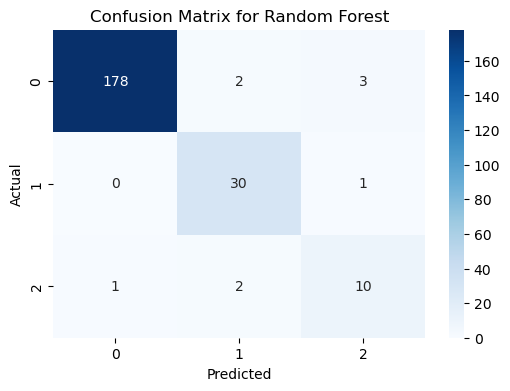

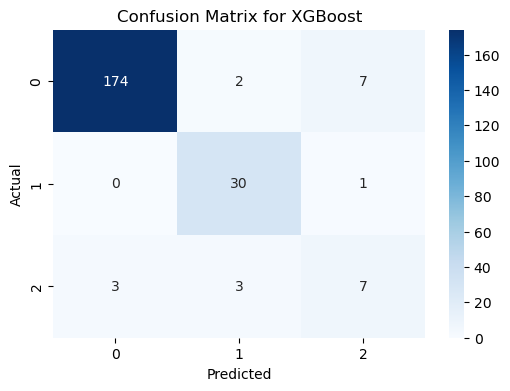

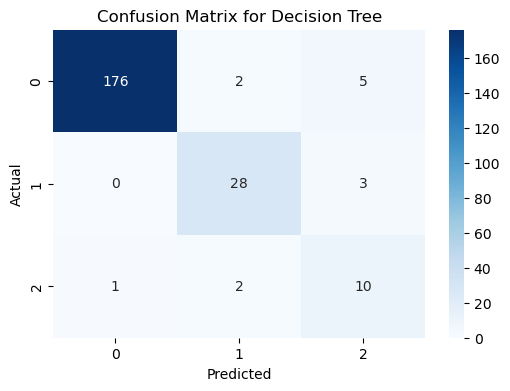

In [58]:
# Define a function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrix for each model
for model_name, y_pred in zip(['Random Forest', 'XGBoost', 'Decision Tree'], [y_pred_rf, y_pred_xgb, y_pred_dt]):
    plot_confusion_matrix(y_test, y_pred, model_name)